In [1]:
### Importing the library
import os
os.chdir("D:\\DataScienceLU\\statsexcercise")
os.getcwd()

'D:\\DataScienceLU\\statsexcercise'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
# See the distinct values in the Survived column (Dependent variable)
df.Kyphosis.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [5]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [6]:
df.columns()


TypeError: 'Index' object is not callable

In [7]:
df.Columns


AttributeError: 'DataFrame' object has no attribute 'Columns'

In [8]:
df.columns()

TypeError: 'Index' object is not callable

In [9]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [10]:
x = pd.DataFrame()

# These are independent variable

x['Age'] = df['Age']
x['Number'] = df['Number']
x['Start'] = df['Start']


In [11]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [12]:
y = df['Kyphosis']
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     81 non-null     int64
 1   Number  81 non-null     int64
 2   Start   81 non-null     int64
dtypes: int64(3)
memory usage: 2.0 KB


In [14]:
y.info()

AttributeError: 'Series' object has no attribute 'info'

<AxesSubplot:ylabel='Age'>

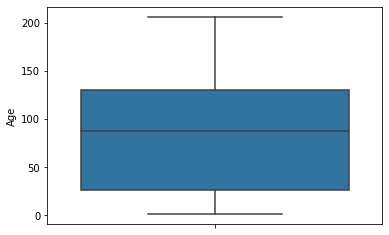

In [15]:
sns.boxplot(y='Age', data=x)

In [16]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(64, 3)
(17, 3)
(64,)
(64,)


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
model.coef_

array([[ 0.00757588,  0.33421996, -0.17119109]])

In [19]:
model.intercept_

array([-1.87122702])

In [20]:
y_pred = model.predict(x_test)

In [21]:
print(y_pred)
print(y_test)

['absent' 'absent' 'present' 'absent' 'absent' 'absent' 'present' 'absent'
 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent'
 'absent']
33     absent
61    present
21    present
32     absent
20     absent
13     absent
52    present
25     absent
22    present
27     absent
30     absent
2     present
67     absent
16     absent
69     absent
6      absent
53     absent
Name: Kyphosis, dtype: object


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.80      1.00      0.89        12
     present       1.00      0.40      0.57         5

    accuracy                           0.82        17
   macro avg       0.90      0.70      0.73        17
weighted avg       0.86      0.82      0.80        17



In [24]:
confusion_matrix(y_test, y_pred)

array([[12,  0],
       [ 3,  2]], dtype=int64)

In [25]:
14/17

0.8235294117647058